In [45]:
import pandas as pd
import numpy as np
#import figure
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [46]:
df = pd.read_csv('/Users/dishengliu/Documents/GitHub/feature-selection/mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:

X = df.drop(['class'],axis = 1)

Y = df['class']


In [48]:
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [49]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## 对特征进行One-hot 编码（X）

In [79]:
X = pd.get_dummies(X,prefix_sep='_')
X.head()


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 进行X标准化处理

In [51]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

## 处理label（Y）


In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
Y = LabelEncoder().fit_transform(Y)
print(len(Y))
Y


8124


array([1, 0, 0, ..., 0, 1, 0])

## 分割数据


In [53]:
from sklearn.model_selection import train_test_split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30,  random_state = 101)
len (X_Train)
len (Y_Train)
len (X_Test)

2438

# RF 可以对特征进行importance rank
#### 得到对模型结果影响大的重要特征
### 从而进行数据features selection

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

start = time.process_time()

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)

predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))

print('---------------------')
print(classification_report(Y_Test,predictionforest))

print("run %f sec."%(time.process_time() - start))

[[1274    0]
 [   0 1164]]
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

run 3.603997 sec.


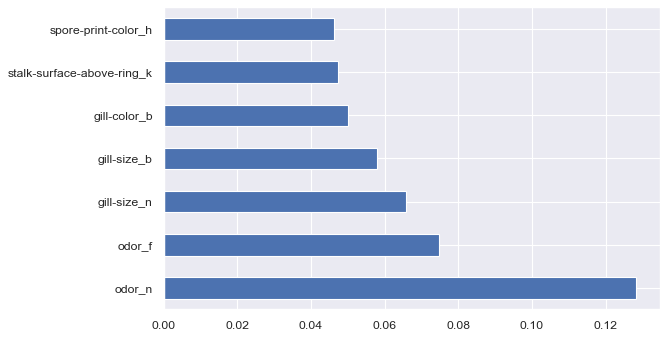

In [106]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [34]:
X_Reduced = X[['odor_n','odor_f', 'gill-size_n','gill-size_b']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30,  random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

2.173897
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### 决策树（单颗）
通过可视化一个训练过的决策树来理解如何进行特征选择。

In [35]:
from sklearn import tree 

start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print('run %f sec.'%(time.process_time() - start))
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))


run 0.043803 sec.
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



**树结构顶部的特征是我们的模型为了执行分类而保留的最重要的特征**

**因此，只选择顶部的前几个特征，而放弃其他特征，可能创建一个准确度非常可观的模型。**

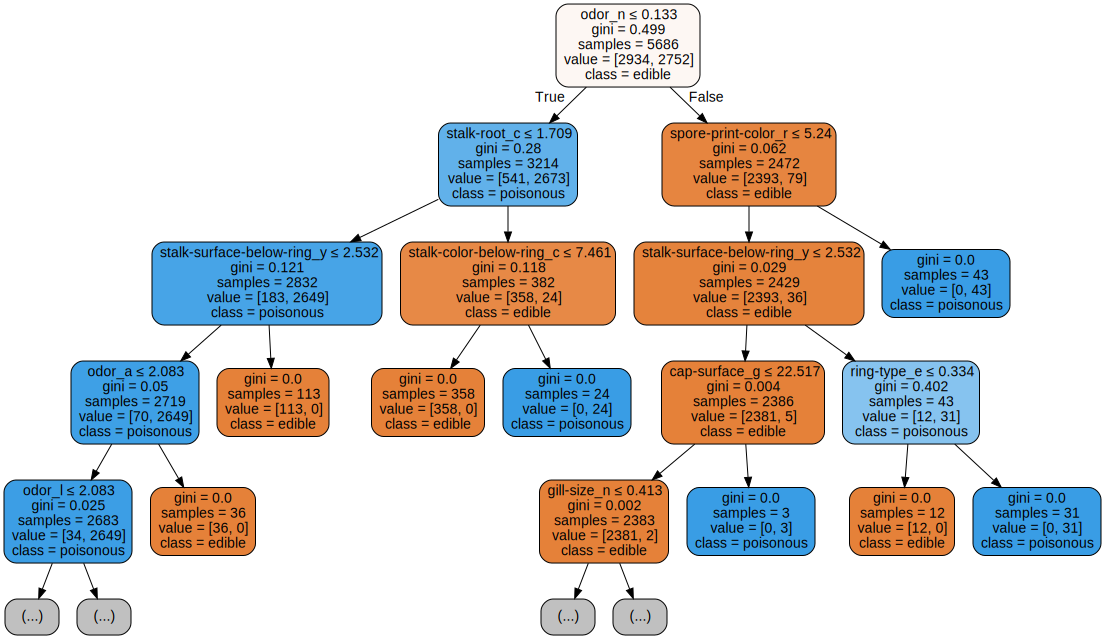

In [109]:
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz


data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
        class_names=['edible', 'poisonous'], 
        filled=True, rounded=True, 
        max_depth=4,
        special_characters=True)
graph = graphviz.Source(data)
graph


# 递归特征消除（RFE）

递归特征消除（RFE）将机器学习模型的实例和要使用的最终期望特征数作为输入。然后，它递归地减少要使用的特征的数量，采用的方法是使用机器学习模型精度作为度量对它们进行排序。  
创建一个 for 循环，其中输入特征的数量是我们的变量，这样就可以通过跟踪在每个循环迭代中注册的精度，找出我们的模型所需的最佳特征数量。使用 RFE 支持方法，我们可以找出被评估为最重要的特征的名称（rfe.support 返回一个布尔列表，其中 true 表示一个特征被视为重要，false 表示一个特征不重要）。

In [57]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

/Users/dishengliu/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


331.956235
Overall Accuracy using RFE:  0.9675963904840033


# SelecFromModel

selectfrommodel 是另一种 scikit 学习方法，可用于特征选择。此方法可用于具有 coef 或 feature 重要性属性的所有不同类型的 scikit 学习模型（拟合后）。与 rfe 相比，selectfrommodel 是一个不太可靠的解决方案。实际上，selectfrommodel 只是根据计算出的阈值（不涉及优化迭代过程）删除不太重要的特性。    
为了测试 selectfrommodel 的有效性，我决定在这个例子中使用一个 ExtraTreesClassifier。     
ExtratreesClassifier（极端随机树）是基于树的集成分类器，与随机森林方法相比，它可以产生更少的方差（因此减少了过拟合的风险）。随机森林和极随机树的主要区别在于极随机树中节点的采样不需要替换。

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

0.6809370000000001
2.8814379999999957
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# 相关系数分析

为了减少数据集中的特征数量，另一种可能的方法是检查特征与标签的相关性。  
使用皮尔逊相关，我们的返回系数值将在-1 和 1 之间变化。
  
1. 算featrues 和 Y之间的correlation，只取abs（corr）大于特定阈值的features进行训练  
2. 另一个可能要控制的方面是--检查所选变量是否彼此高度相关。如果是的话，我们就只需要保留其中一个相关的，去掉其他的。

In [39]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
corr= Numeric_df.corr()
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.5] # 设置阈值：0.5
highest_corr.sort_values(ascending=True)

bruises_f                     0.501530
bruises_t                     0.501530
gill-color_b                  0.538808
gill-size_b                   0.540024
gill-size_n                   0.540024
ring-type_p                   0.540469
stalk-surface-below-ring_k    0.573524
stalk-surface-above-ring_k    0.587658
odor_f                        0.623842
odor_n                        0.785557
Y                             1.000000
Name: Y, dtype: float64

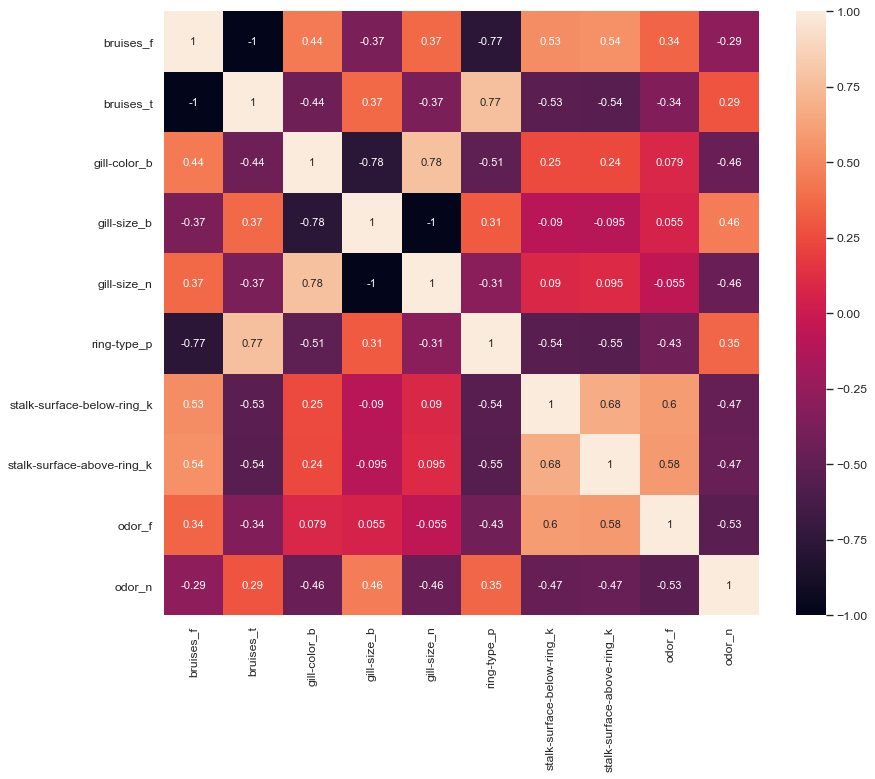

In [102]:
%matplotlib inline
import matplotlib as mpl

import matplotlib.pyplot as plt


plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr2 = Numeric_df[['bruises_f' , 'bruises_t' , 'gill-color_b' , 'gill-size_b' ,  'gill-size_n' , 'ring-type_p' , 'stalk-surface-below-ring_k' ,  'stalk-surface-above-ring_k' , 'odor_f', 'odor_n']].corr()

sns.heatmap(corr2, annot=True, fmt=".2g")
plt.show()

# Lasso regulation 
当将正则化应用于机器学习模型时，我们在模型参数上加上一个惩罚，以避免我们的模型试图太接近我们的输入数据。通过这种方式，我们可以使我们的模型不那么复杂，并且我们可以避免过度拟合（使我们的模型不仅学习关键的数据特征，而且学习它的内在噪声）。      

其中一种可能的正则化方法是套索回归。当使用套索回归时，如果输入特征的系数对我们的机器学习模型训练没有积极的贡献，则它们会缩小。这样，一些特征可能会被自动丢弃，即将它们的系数指定为零。

In [84]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

117
116
LassoCV Best Alpha Scored:  0.0003964898084478502
LassoCV Model Accuracy:  0.9971840741918596
Variables Eliminated:  73
Variables Kept:  44


/Users/dishengliu/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3780035058574076, tolerance: 0.1420043615898695
  positive)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

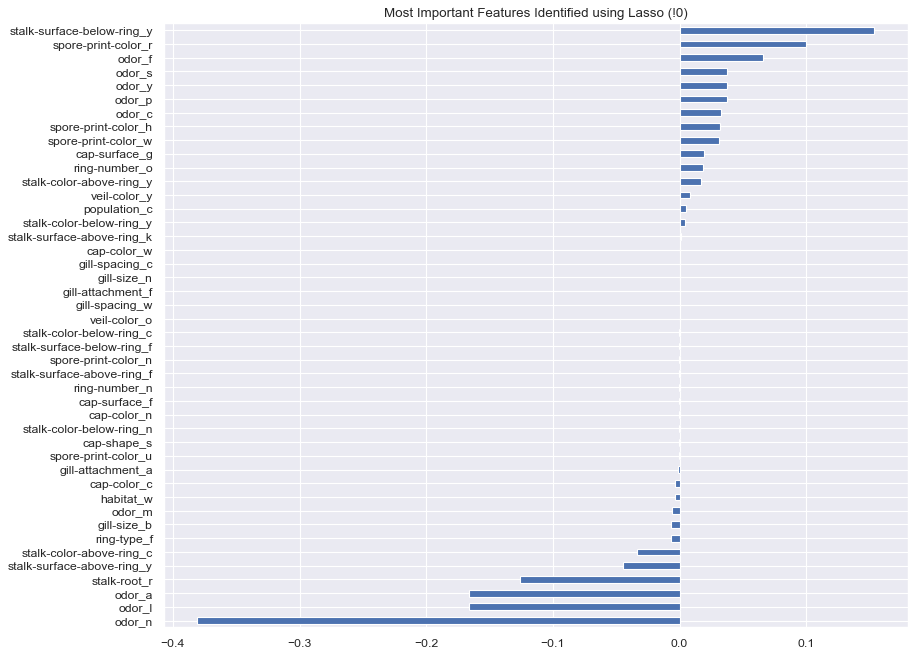

In [86]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")
